# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer" + str(i + 1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer" + str(i + 1))(x)
     
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
EPOCHS = 50
BATCH_SIZE = 256

OPTIMIZERS = [
    keras.optimizers.SGD(lr=0.01, momentum = 0.95, nesterov=True),
    keras.optimizers.Adagrad(lr=0.01),
    keras.optimizers.RMSprop(lr=0.001, rho=0.9),
    keras.optimizers.Adam(lr=0.001)
]

OPT_STATE = {
    0 : ["SGD", 0.01], 
    1 : ["Adagrad", 0.01], 
    2 : ["RMSprop", 0.001],
    3 : ["Adam", 0.001]
}

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for i, optimizer in enumerate(OPTIMIZERS):
    keras.backend.clear_session()
    print("Experiment with %s, LR = %.3f"%(OPT_STATE[i][0], OPT_STATE[i][1]))
    model = build_mlp(input_shape = x_train.shape[1:])
    model.summary()
    
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(x_test, y_test),
             shuffle=True)
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "%s, LR = %.3f"%(OPT_STATE[i][0], OPT_STATE[i][1])
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

racy: 0.5729 - val_loss: 1.4284 - val_accuracy: 0.4981
Epoch 31/50
50000/50000 [==============================] - 2s 30us/step - loss: 1.2024 - accuracy: 0.5772 - val_loss: 1.4138 - val_accuracy: 0.5064
Epoch 32/50
50000/50000 [==============================] - 2s 31us/step - loss: 1.1942 - accuracy: 0.5788 - val_loss: 1.3965 - val_accuracy: 0.5056
Epoch 33/50
50000/50000 [==============================] - 2s 30us/step - loss: 1.1851 - accuracy: 0.5829 - val_loss: 1.3733 - val_accuracy: 0.5136
Epoch 34/50
50000/50000 [==============================] - 2s 31us/step - loss: 1.1734 - accuracy: 0.5886 - val_loss: 1.4852 - val_accuracy: 0.4780
Epoch 35/50
50000/50000 [==============================] - 2s 31us/step - loss: 1.1667 - accuracy: 0.5914 - val_loss: 1.3952 - val_accuracy: 0.5087
Epoch 36/50
50000/50000 [==============================] - 2s 31us/step - loss: 1.1572 - accuracy: 0.5940 - val_loss: 1.4720 - val_accuracy: 0.4864
Epoch 37/50
50000/50000 [==============================] 

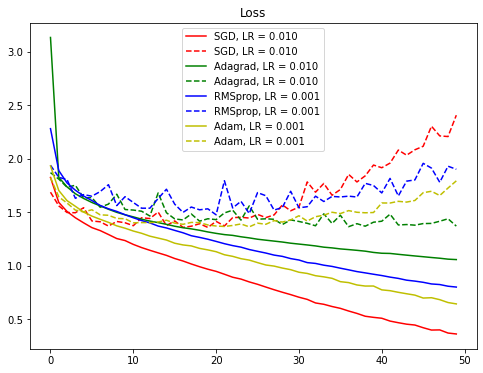

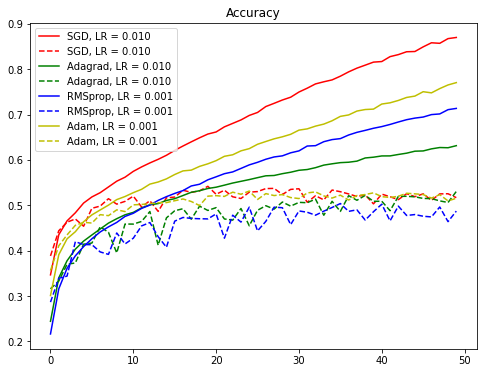

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()